In [12]:
from brian2 import *

ImportError: No module named brian2tools

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 2s


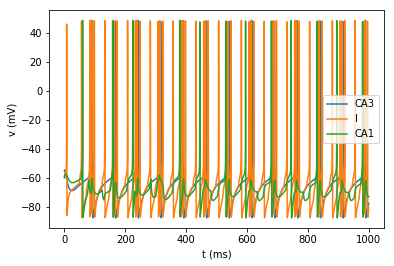

In [9]:
# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2) * area
gl = (5e-5*siemens*cm**-2) * area

El = -60*mV
EK = -90*mV
ENa = 50*mV
g_na = (100*msiemens*cm**-2) * area
g_kd = (30*msiemens*cm**-2) * area
VT = -63*mV
# Time constants
taue = 5*ms
taui = 10*ms
# Reversal potentials
Ee = 0*mV
Ei = -80*mV
we = 6*nS  # excitatory synaptic weight
wi = 67*nS  # inhibitory synaptic weight

# The model
eqs = Equations('''
dv/dt = (gl*(El-v)+ge*(Ee-v)+gi*(Ei-v)-
         g_na*(m*m*m)*h*(v-ENa)-
         g_kd*(n*n*n*n)*(v-EK))/Cm : volt
dm/dt = alpha_m*(1-m)-beta_m*m : 1
dn/dt = alpha_n*(1-n)-beta_n*n : 1
dh/dt = alpha_h*(1-h)-beta_h*h : 1
dge/dt = -ge*(1./taue) : siemens
dgi/dt = -gi*(1./taui) : siemens
alpha_m = 0.32*(mV**-1)*(13*mV-v+VT)/
         (exp((13*mV-v+VT)/(4*mV))-1.)/ms : Hz
beta_m = 0.28*(mV**-1)*(v-VT-40*mV)/
        (exp((v-VT-40*mV)/(5*mV))-1)/ms : Hz
alpha_h = 0.128*exp((17*mV-v+VT)/(18*mV))/ms : Hz
beta_h = 4./(1+exp((40*mV-v+VT)/(5*mV)))/ms : Hz
alpha_n = 0.032*(mV**-1)*(15*mV-v+VT)/
         (exp((15*mV-v+VT)/(5*mV))-1.)/ms : Hz
beta_n = .5*exp((10*mV-v+VT)/(40*mV))/ms : Hz
''')

P = NeuronGroup(441, model=eqs, threshold='v>-20*mV', refractory=3*ms,
                method='exponential_euler')
Pe = P[:400]
Pi = P[400:440]
P_CA1 = P[440:]
Ce = Synapses(Pe, P_CA1, on_pre='ge+=we')
Ce_i  = Synapses(Pe, Pi, on_pre='ge+=we')
Ci = Synapses(Pi, P_CA1, on_pre='gi+=wi')
Ce.connect(p=0.02)
Ce_i.connect(p=0.02)
Ci.connect(p=0.02)

# Initialization
P.v = 'El + (randn() * 5 - 5)*mV'
P.ge = '(randn() * 1.5 + 4) * 10.*nS'
#P.gi = '(randn() * 12 + 20) * 10.*nS'
prop = 2.
P.gi = P.ge* prop

# Record a few traces
trace = StateMonitor(P, 'v', record=[1, 400, 440])
run(1 * second, report='text')
plot(trace.t/ms, trace[1].v/mV, label="CA3")
plot(trace.t/ms, trace[400].v/mV, label="I")
plot(trace.t/ms, trace[440].v/mV, label="CA1")
xlabel('t (ms)')
ylabel('v (mV)')
legend(loc = 'center right')
show()